# Evaluate Competitor Presence

### Question to Answer
- Which regions have high contractor staffing usage, indicating competitor presence, and how can Clipboard Health differentiate itself in these markets?

## Objective 
- Identify regions where Clipboard Health might face competition. 
- Recommend strategies to differentiate its services.

## Methodology 
- Identify Facilities with High Contractor Staffing  
- Group by Region 
- Analyze the Contractor Staffing Trends (Competitor Presence)
- Recommendation (Visualization)

### Importing Libraries and Loading Dataset

In [1]:
# Importing Libraries
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns


# Load the cleaned PBJ dataset
df_cleaned = pd.read_csv('C:/Users/hp/Downloads/Cleaned_PBJ_Daily_Nurse_Staffing_Q1_2024.csv')

C:\Users\hp\AppData\Local\Temp\ipykernel_9352\1311619139.py:8: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df_cleaned = pd.read_csv('C:/Users/hp/Downloads/Cleaned_PBJ_Daily_Nurse_Staffing_Q1_2024.csv')


### Identify Facilities with High Contractor Staffing

In [8]:
# Calculate total staffing hours (including employees and contractors)
df_cleaned['Total_Staffing_Hours'] = (
    df_cleaned['Hrs_RN'] + df_cleaned['Hrs_LPN'] + df_cleaned['Hrs_CNA'] +
    df_cleaned['Hrs_RNDON'] + df_cleaned['Hrs_RNadmin'] + 
    df_cleaned['Hrs_LPNadmin'] + df_cleaned['Hrs_NAtrn'] + 
    df_cleaned['Hrs_MedAide']
)

# Calculate total contractor hours
df_cleaned['Total_Contractor_Hours'] = (
    df_cleaned['Hrs_RN_ctr'] + df_cleaned['Hrs_LPN_ctr'] + df_cleaned['Hrs_CNA_ctr'] +
    df_cleaned['Hrs_RNDON_ctr'] + df_cleaned['Hrs_RNadmin_ctr'] + 
    df_cleaned['Hrs_LPNadmin_ctr'] + df_cleaned['Hrs_NAtrn_ctr'] + 
    df_cleaned['Hrs_MedAide_ctr']
)

### Group by Region

In [9]:
# Group by State and calculate total contractor staffing hours per region
contractor_by_state = df_cleaned.groupby('STATE')['Total_Contractor_Hours'].sum().reset_index()

# Sort by highest contractor staffing hours
contractor_by_state_sorted = contractor_by_state.sort_values(by='Total_Contractor_Hours', ascending=False)

# View the top regions with highest contractor staffing
print(contractor_by_state_sorted.head())


   STATE  Total_Contractor_Hours
34    NY              4039449.99
38    PA              3577744.31
31    NJ              2036180.84
14    IL              1557327.83
4     CA              1346552.77


### Analyze the Contractor Staffing Trends (Competitor Presence)

In [10]:
# Calculate contractor staffing proportion
df_cleaned['Contractor_Proportion'] = df_cleaned['Total_Contractor_Hours'] / df_cleaned['Total_Staffing_Hours']

# Group by state (or region) and calculate the average contractor staffing proportion
contractor_usage_by_state = df_cleaned.groupby('STATE')['Contractor_Proportion'].mean().reset_index()

# Sort by highest contractor staffing proportion
contractor_usage_by_state = contractor_usage_by_state.sort_values(by='Contractor_Proportion', ascending=False)

# Identify the top regions with high contractor staffing (strong competitor presence)
top_regions = contractor_usage_by_state.head()

# Display top regions with highest contractor staffing
print(top_regions)


   STATE  Contractor_Proportion
47    VT               0.282388
21    ME               0.174177
28    ND               0.169072
38    PA               0.142912
31    NJ               0.140344


C:\Users\hp\AppData\Local\Temp\ipykernel_9352\2521152651.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=contractor_by_state_sorted.head(10), x='STATE', y='Total_Contractor_Hours', palette='viridis')


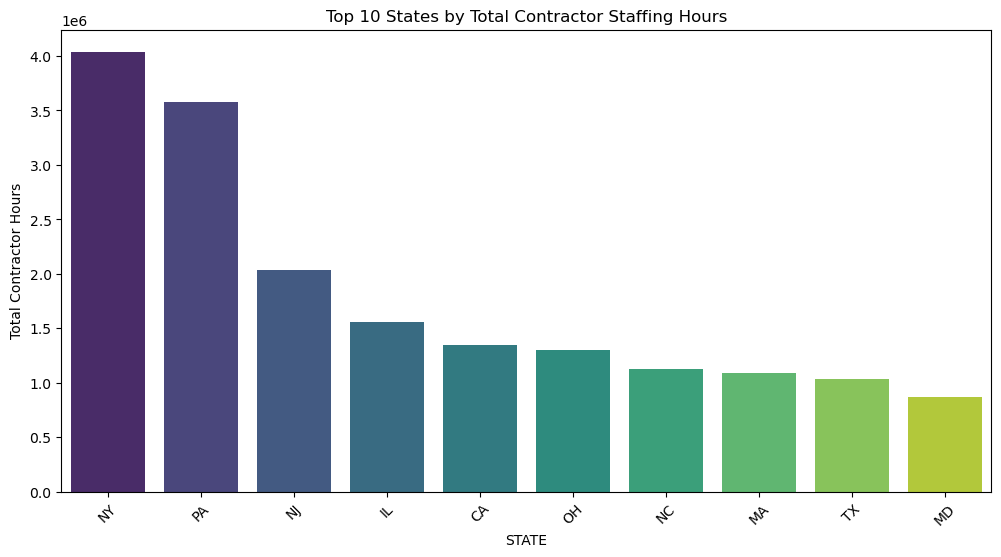

In [13]:
plt.figure(figsize=(12, 6))
sns.barplot(data=contractor_by_state_sorted.head(10), x='STATE', y='Total_Contractor_Hours', palette='viridis')
plt.title('Top 10 States by Total Contractor Staffing Hours')
plt.xlabel('STATE')
plt.ylabel('Total Contractor Hours')
plt.xticks(rotation=45)
plt.show()


### Full Code

C:\Users\hp\AppData\Local\Temp\ipykernel_9352\3464392155.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=contractor_by_state_sorted.head(10), x='STATE', y='Total_Contractor_Hours', palette='viridis')


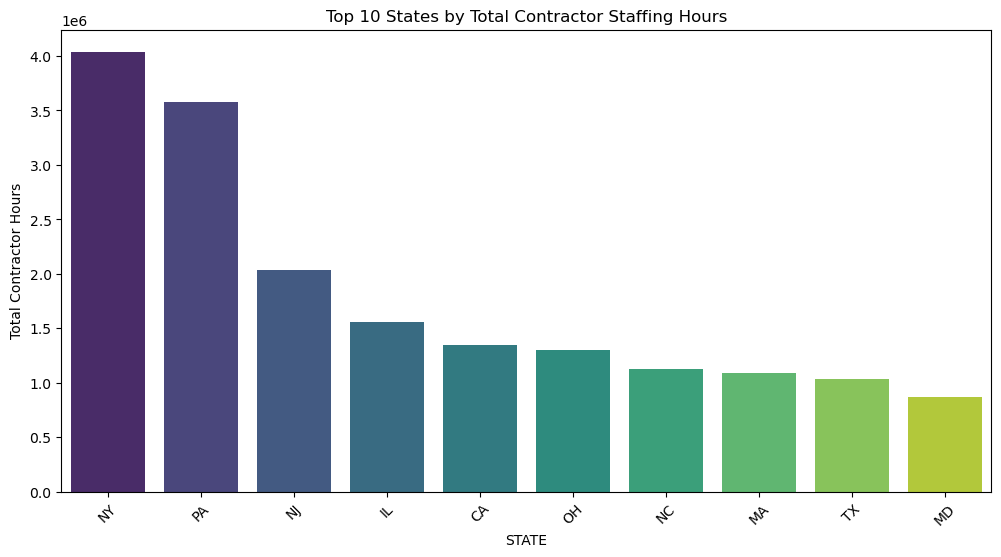

In [15]:
# Calculate total staffing hours (including employees and contractors)
df_cleaned['Total_Staffing_Hours'] = (
    df_cleaned['Hrs_RN'] + df_cleaned['Hrs_LPN'] + df_cleaned['Hrs_CNA'] +
    df_cleaned['Hrs_RNDON'] + df_cleaned['Hrs_RNadmin'] + 
    df_cleaned['Hrs_LPNadmin'] + df_cleaned['Hrs_NAtrn'] + 
    df_cleaned['Hrs_MedAide']
)

# Calculate total contractor hours
df_cleaned['Total_Contractor_Hours'] = (
    df_cleaned['Hrs_RN_ctr'] + df_cleaned['Hrs_LPN_ctr'] + df_cleaned['Hrs_CNA_ctr'] +
    df_cleaned['Hrs_RNDON_ctr'] + df_cleaned['Hrs_RNadmin_ctr'] + 
    df_cleaned['Hrs_LPNadmin_ctr'] + df_cleaned['Hrs_NAtrn_ctr'] + 
    df_cleaned['Hrs_MedAide_ctr']
)

# Group by State and calculate total contractor staffing hours per region
contractor_by_state = df_cleaned.groupby('STATE')['Total_Contractor_Hours'].sum().reset_index()

# Sort by highest contractor staffing hours
contractor_by_state_sorted = contractor_by_state.sort_values(by='Total_Contractor_Hours', ascending=False)

# Calculate contractor staffing proportion
df_cleaned['Contractor_Proportion'] = df_cleaned['Total_Contractor_Hours'] / df_cleaned['Total_Staffing_Hours']

# Group by state (or region) and calculate the average contractor staffing proportion
contractor_usage_by_state = df_cleaned.groupby('STATE')['Contractor_Proportion'].mean().reset_index()

# Sort by highest contractor staffing proportion
contractor_usage_by_state = contractor_usage_by_state.sort_values(by='Contractor_Proportion', ascending=False)

# Identify the top regions with high contractor staffing (strong competitor presence)
top_regions = contractor_usage_by_state.head()

plt.figure(figsize=(12, 6))
sns.barplot(data=contractor_by_state_sorted.head(10), x='STATE', y='Total_Contractor_Hours', palette='viridis')
plt.title('Top 10 States by Total Contractor Staffing Hours')
plt.xlabel('STATE')
plt.ylabel('Total Contractor Hours')
plt.xticks(rotation=45)
plt.show()
